# semantic parsing

## definition

Semantic parsing: convert a sentence into a formal knowledge representation of its meaning, e.g. logical expression (First-order logic), SQL queries, AMR (Abstract Meaning Representation). Inference algorithms then use this formal representation to reason about the knowledge and answer queries or draw new conclusions. 


- semantic parsing is a method used for compositional semantics

    compositional semantics: meaning of sentence depends on meaning and combination of constituents 成分 (words, phrases)

- semantic parsing vs. syntactic parsing

| Aspect            | Syntactic Parsing                       | Semantic Parsing                         |
|-------------------|-----------------------------------------|------------------------------------------|
| Focus             | Structure and grammar of sentences      | Meaning and representation of sentences  |
| Output            | Parse tree or dependency structure      | Formal representation (e.g., FOL)        |
| Methods           | Top-down, bottom-up, chart parsing.| Rule-based, frame semantics.        |
| Applications      | Syntax checking, POS tagging.      | Question answering, information extraction. |

## example

FOL representation of sentence "Javier likes pizza" is `likes(Javier, pizza)`.

| Context-Free Grammar rule | semantic attachment | First order logic Type |
|----------------------|-------------------|------------------------|
| S -> NP VP           | VP.Sem(NP.Sem)    | t                      |
| VP -> V NP           | V.Sem(NP.Sem)     | <e,t>                  |
| NP -> N              | N.Sem             | e                      |
| V -> likes           | λ x,y likes(x,y)  | <e,<e,t>>              |
| N -> Javier          | Javier            | e                      |
| N -> pizza           | pizza             | e                      |

`S -> NP VP {VP.Sem(NP.Sem)} t`: A sentence (S) consists of a noun phrase (NP) followed by a verb phrase (VP). The semantics of S is the result of applying the semantics of VP to the semantics of NP. The type of S is 't' (truth value).

`VP -> V NP {V.Sem(NP.Sem)} <e,t>`: A verb phrase (VP) consists of a verb (V) followed by a noun phrase (NP). The semantics of VP is the result of applying the semantics of V to the semantics of NP. The type of VP is <e,t> (a function from entities to truth values).

`NP -> N {N.Sem} e`: A noun phrase (NP) consists of a noun (N). The semantics of NP is the semantics of N. The type of NP is 'e' (entity).

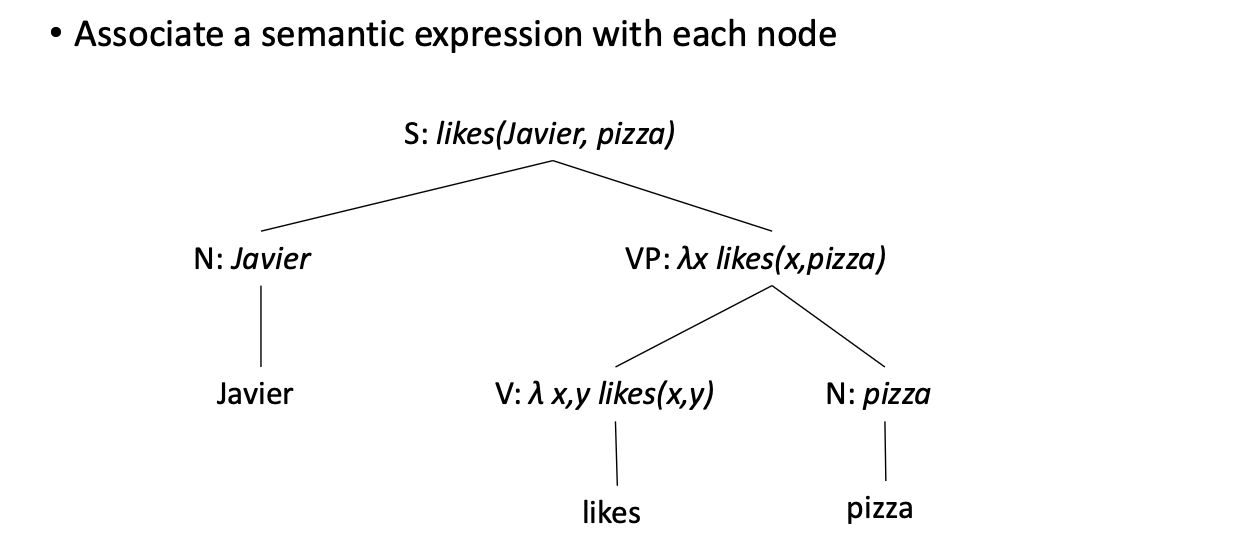

## Algorithms for Semantic Parsing


Tree-Adjoining Grammar (TAG)

Combinatory Categorial Grammar (CCG)

seq2seq Models: Deep learning models like RNNs, LSTMs [Dong and Lapata (2016)], or transformers

<img src='https://evelinehong.github.io/assets/images/seq2seq.png' />

## AMR parsing 

AMR parsing: a type of semantic parsing that represent a sentence as a graph called AMR (Abstract Meaning Representation). 

- a rooted, directed, and labeled graph. 

- nodes: concepts, edges: relations between concepts. 

### advantage

integrates multiple linguistic aspects into a single structure

- Predicate-Argument Structure 谓语参数结构: Capturing the relationships between predicates (usually verbs) and their arguments (typically nouns or noun phrases).

- Named Entity Recognition

- Coreference Resolution

- Wikification: Linking entities in the AMR graph to their corresponding Wikipedia pages, providing additional context and grounding for the entities.

### limitaion

Multilingual consideration: English only

Quantifier scope: AMR does not explicitly handle the scope of quantifiers, which may lead to ambiguities in representing the meaning of sentences with multiple quantifiers.

Co-references across sentences: AMR currently focuses on representing the semantics of individual sentences and does not handle cross-sentence coreference resolution.

Grammatical number, tense, aspect, quotation marks: AMR abstracts away from certain grammatical features like number, tense, and aspect, and does not include quotation marks, which could result in the loss of some information from the original text.

noun-noun or noun-adjective relations: AMR may not capture all the relationships between nouns and adjectives or between two nouns, especially when they are less common or more complex.

detailed frames: Although AMR provides a general framework for representing meaning, it may not include detailed frames for specific situations (e.g., Earthquake with roles for magnitude, epicenter, casualties, etc.) that would allow a more fine-grained representation of the meaning.

## Seq2SQL dataset

natural language to SQL query: users can interact with databases and retrieve information more quickly and efficiently than if they had to write SQL queries manually.

[Seq2SQL dataset](https://github.com/jkkummerfeld/text2sql-data) contains 

- Sentences with annotated variables

- SQL queries

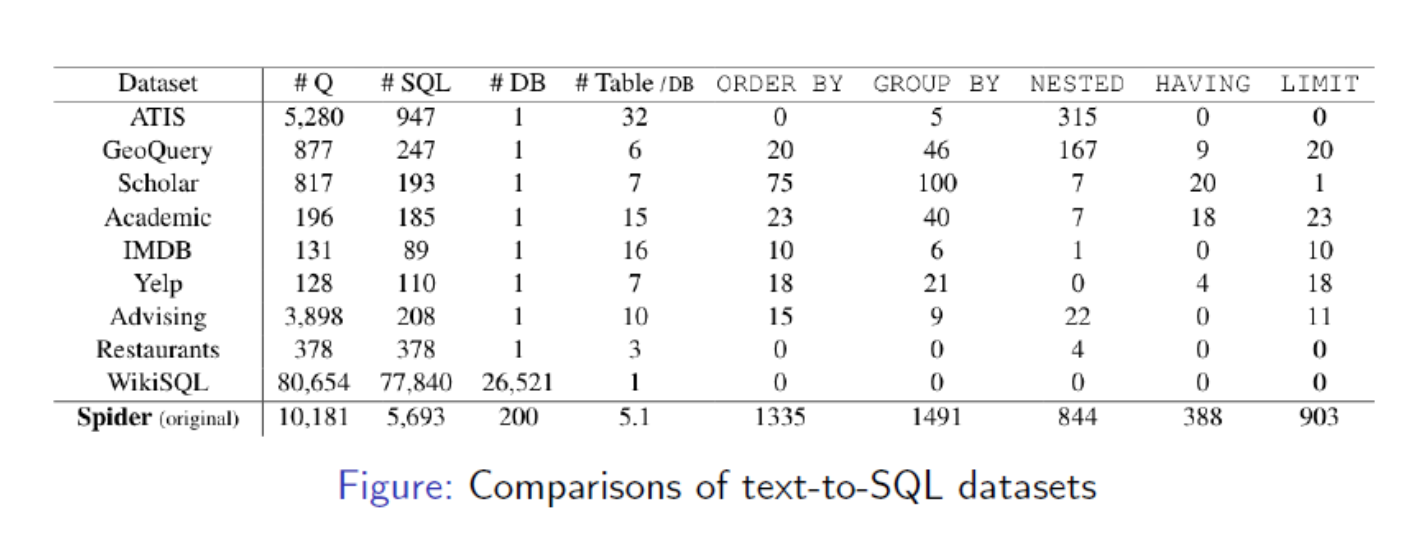

| Dataset      | Data Size | Description                                      | Example Sentence                              | SQL Query                                                                                     | Semantic Representation                              |
|--------------|-----------|--------------------------------------------------|---------------------------------------------|------------------------------------------------------------------------------------------------|-------------------------------------------------------|
| ATIS         | ~5,000    | Flight-booking task questions                    | Show me flights from Pittsburgh to Seattle  | SELECT * FROM flights WHERE origin='Pittsburgh' AND destination='Seattle'                    | λ$0 e (and (flight $0) (from $0 pittsburgh:ci) (to $0 seattle:ci))  |
| GeoQuery     | ~250      | US geography questions                           | Which state has the most rivers running through it? | SELECT state FROM rivers GROUP BY state ORDER BY COUNT(*) DESC LIMIT 1                          | argmax $0 (state:t $0) (count $1 (and (river:t $1) (loc:t $1 $0)))                            |
| Restaurants  | ~1,000    | Restaurant questions                             | Find Chinese restaurants in New York      | SELECT * FROM restaurants WHERE cuisine='Chinese' AND location='New York'                     | λ$0 e (and (restaurant $0) (cuisine $0 chinese) (loc $0 new_york))                           |
| Scholar      | ~10,000   | Academic publication questions                   | Find papers on machine learning published in 2020 | SELECT * FROM papers WHERE title LIKE '%machine learning%' AND year=2020                       | λ$0 e (and (paper $0) (title $0 machine_learning) (year $0 2020))                             |
| Academic     | ~4,000    | Microsoft Academic Search questions              | List authors with publications on artificial intelligence | SELECT author FROM authors WHERE publication_title LIKE '%artificial intelligence%'            | λ$0 e (and (author $0) (pub_title $0 artificial_intelligence))                                |
| Yelp         | ~1,200    | Yelp website questions                           | Find the top-rated Italian restaurants in San Francisco | SELECT * FROM restaurants WHERE category='Italian' AND city='San Francisco' ORDER BY rating DESC | λ$0 e (and (restaurant $0) (category $0 italian) (city $0 san_francisco) (order_by_rating $0)) |
| IMDB         | ~1,200    | Internet Movie Database questions                | What are the highest-grossing movies in 2020? | SELECT * FROM movies WHERE release_year=2020 ORDER BY box_office DESC                          | λ$0 e (and (movie $0) (year $0 2020) (order_by_box_office $0))                                |
| WikiSQL      | ~80,000   | Wikipedia table questions                        | What are the populations of countries in Europe? | SELECT country, population FROM countries WHERE continent='Europe'                             | λ$0 e (and (country $0) (continent $0 europe) (population $0))                                 |
| Advising     | ~1,000    | University course information questions          | List computer science courses with a 4-credit requirement | SELECT * FROM courses WHERE department='Computer Science' AND credits=4                         | λ$0 e (and (course $0) (dept $0 computer_science) (credits $0 4))                              |


<img src='https://techcrunch.com/wp-content/uploads/2017/08/unnamed2.gif' />